In [126]:
import sys
#sys.path.insert(1, '/content/drive/MyDrive/Credentials/')
from credit_x import *

In [127]:
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials


#Initialize SpotiPy with user credentias
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= client_id,
                                                           client_secret= client_secret))

In [128]:
#Playlist I want to scrap

playlist_id="7htu5ftbLBRFAwiuHVcUAg"
username="spotify"

playlist = sp.user_playlist_tracks(username, playlist_id)

In [130]:
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

tracks=get_playlist_tracks(username, playlist_id)

In [131]:
def get_playlist_info(tracks):
    
    playlist_dict={}

    for i in range(len(tracks)):
        id_list=[]
        id_list.append(tracks[i]["track"]["name"])
        #trackname=playlist["items"][s]["track"]["name"]
        for j in range(len(tracks[i]["track"]["artists"])):
            id_list.append(tracks[i]["track"]["artists"][j]["name"])
            
        playlist_dict[tracks[i]["track"]["id"]]=id_list
        
    return playlist_dict

playlist_dict=get_playlist_info(tracks)

In [133]:
len(playlist_dict)

9968

In [6]:
def features(tracks):
    song_features = {}
    for i in range(len(tracks)):
        song_features[tracks[i]["track"]["id"]] = sp.audio_features(tracks[i]["track"]["uri"])
    return song_features

#big_spotify=features(tracks)

In [9]:
#song_id=list(big_spotify.keys()) 
#print(len(song_id))

9968


In [11]:
import pandas as pd

def get_features(song_features): 
    
    song_id=list(song_features.keys()) 
    features=list(song_features[song_id[0]][0])

    feature_dict={}

    for i in range(len(features)):
        value_list=[]

        for n in range(len(song_features)): 

            result=song_features[song_id[n]][0][features[i]]
            value_list.append(result)
            #print(result)
            feature_dict[features[i]]=value_list

    df=pd.DataFrame.from_dict(feature_dict)

    return df

#df = get_features(big_spotify)

In [14]:
df_original=df

df_original.to_csv("/Users/carolinvogt/Becoming_Data_Analyst/Week_07/Day_03/lab-api-wrappers/df_original.csv")

In [26]:
import pandas as pd

df_playlist=pd.read_csv("df_original.csv")

## Import choosen playlist

In [27]:
df_playlist.set_index('id',inplace=True)
df_playlist.drop(["Unnamed: 0"],axis=1, inplace=True)
df_playlist

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
id,,,,,,,,,,,,,,,,,
2MvvoeRt8NcOXWESkxWn3g,0.511,0.472,4,-9.277,1,0.0910,0.534,0.614000,0.1100,0.0399,127.978,audio_features,spotify:track:2MvvoeRt8NcOXWESkxWn3g,https://api.spotify.com/v1/tracks/2MvvoeRt8NcO...,https://api.spotify.com/v1/audio-analysis/2Mvv...,258969,4
6UFivO2zqqPFPoQYsEMuCc,0.742,0.546,1,-7.694,1,0.0315,0.172,0.380000,0.1150,0.8680,104.996,audio_features,spotify:track:6UFivO2zqqPFPoQYsEMuCc,https://api.spotify.com/v1/tracks/6UFivO2zqqPF...,https://api.spotify.com/v1/audio-analysis/6UFi...,260520,4
4Musyaro0NM5Awx8b5c627,0.609,0.629,10,-5.024,1,0.0264,0.425,0.000000,0.0978,0.3250,99.955,audio_features,spotify:track:4Musyaro0NM5Awx8b5c627,https://api.spotify.com/v1/tracks/4Musyaro0NM5...,https://api.spotify.com/v1/audio-analysis/4Mus...,241467,4
1CkvWZme3pRgbzaxZnTl5X,0.729,0.756,8,-5.119,1,0.0294,0.131,0.000000,0.0527,0.5220,104.945,audio_features,spotify:track:1CkvWZme3pRgbzaxZnTl5X,https://api.spotify.com/v1/tracks/1CkvWZme3pRg...,https://api.spotify.com/v1/audio-analysis/1Ckv...,228293,4
4lLtanYk6tkMvooU0tWzG8,0.706,0.558,2,-7.237,0,0.0593,0.146,0.000000,0.1180,0.2270,110.443,audio_features,spotify:track:4lLtanYk6tkMvooU0tWzG8,https://api.spotify.com/v1/tracks/4lLtanYk6tkM...,https://api.spotify.com/v1/audio-analysis/4lLt...,223253,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2foI6dVPMRC7B3qwjca19u,0.415,0.339,0,-10.278,1,0.0316,0.703,0.000000,0.1750,0.3400,131.765,audio_features,spotify:track:2foI6dVPMRC7B3qwjca19u,https://api.spotify.com/v1/tracks/2foI6dVPMRC7...,https://api.spotify.com/v1/audio-analysis/2foI...,213747,3
1ZfK0enTcbDvb3LznGG7Wl,0.494,0.531,7,-8.146,1,0.4180,0.586,0.000000,0.3250,0.2120,79.220,audio_features,spotify:track:1ZfK0enTcbDvb3LznGG7Wl,https://api.spotify.com/v1/tracks/1ZfK0enTcbDv...,https://api.spotify.com/v1/audio-analysis/1ZfK...,170427,4
1GE57bvEZMZijuQAbQve3H,0.534,0.802,7,-4.669,0,0.2190,0.154,0.000004,0.1710,0.7480,179.998,audio_features,spotify:track:1GE57bvEZMZijuQAbQve3H,https://api.spotify.com/v1/tracks/1GE57bvEZMZi...,https://api.spotify.com/v1/audio-analysis/1GE5...,195957,4


In [28]:
df_playlist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9968 entries, 2MvvoeRt8NcOXWESkxWn3g to 21jGcNKet2qwijlDFuPiPb
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      9968 non-null   float64
 1   energy            9968 non-null   float64
 2   key               9968 non-null   int64  
 3   loudness          9968 non-null   float64
 4   mode              9968 non-null   int64  
 5   speechiness       9968 non-null   float64
 6   acousticness      9968 non-null   float64
 7   instrumentalness  9968 non-null   float64
 8   liveness          9968 non-null   float64
 9   valence           9968 non-null   float64
 10  tempo             9968 non-null   float64
 11  type              9968 non-null   object 
 12  uri               9968 non-null   object 
 13  track_href        9968 non-null   object 
 14  analysis_url      9968 non-null   object 
 15  duration_ms       9968 non-null   int64  
 16  time_sig

In [29]:
df_playlist.drop(["type","uri","track_href","analysis_url","time_signature"],axis=1,inplace=True)
df_playlist

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
id,,,,,,,,,,,,
2MvvoeRt8NcOXWESkxWn3g,0.511,0.472,4,-9.277,1,0.0910,0.534,0.614000,0.1100,0.0399,127.978,258969
6UFivO2zqqPFPoQYsEMuCc,0.742,0.546,1,-7.694,1,0.0315,0.172,0.380000,0.1150,0.8680,104.996,260520
4Musyaro0NM5Awx8b5c627,0.609,0.629,10,-5.024,1,0.0264,0.425,0.000000,0.0978,0.3250,99.955,241467
1CkvWZme3pRgbzaxZnTl5X,0.729,0.756,8,-5.119,1,0.0294,0.131,0.000000,0.0527,0.5220,104.945,228293
4lLtanYk6tkMvooU0tWzG8,0.706,0.558,2,-7.237,0,0.0593,0.146,0.000000,0.1180,0.2270,110.443,223253
...,...,...,...,...,...,...,...,...,...,...,...,...
2foI6dVPMRC7B3qwjca19u,0.415,0.339,0,-10.278,1,0.0316,0.703,0.000000,0.1750,0.3400,131.765,213747
1ZfK0enTcbDvb3LznGG7Wl,0.494,0.531,7,-8.146,1,0.4180,0.586,0.000000,0.3250,0.2120,79.220,170427
1GE57bvEZMZijuQAbQve3H,0.534,0.802,7,-4.669,0,0.2190,0.154,0.000004,0.1710,0.7480,179.998,195957


In [30]:
li=list(df_playlist.columns)

In [37]:
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [46]:
df_prep = StandardScaler().fit_transform(df_playlist)

In [47]:
def auto_kmeans(df,limit):
    
    n=1
    k_means_dict={}
    
    while n!=limit:
    
        n=n+1

        kmeans = KMeans(n_clusters=8,
                    n_init=n,  # try with 1, 4, 8, 20, 30, 100...
                    max_iter=2,
                    tol=0, ##stop after max_iter or if this value is reached
                    algorithm="full",
                    random_state=1234)
        kmeans.fit(df)

        k_means_dict[n]=kmeans.inertia_
        
        key_minimum=min(k_means_dict, key=k_means_dict.get)
        value_minimum=k_means_dict[key_minimum]
        
    return key_minimum, value_minimum

In [48]:
key_minimum, value_minimum=auto_kmeans(df_prep,200)
key_minimum, value_minimum

(132, 70010.89726860306)

## Chosing K

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

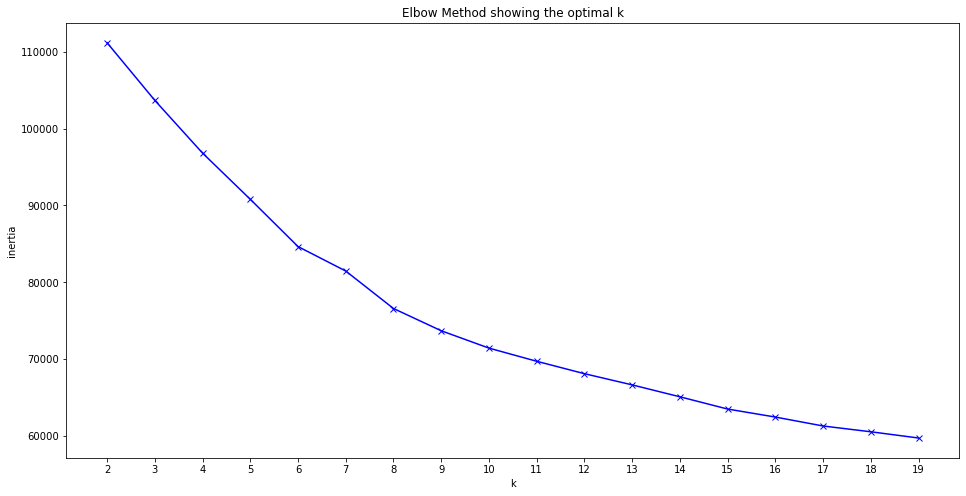

In [30]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df_prep)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

## Silouhette

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

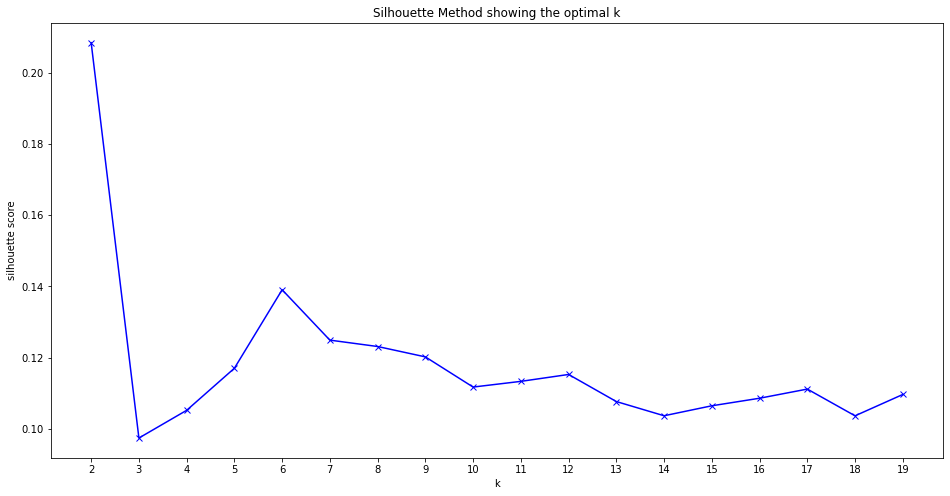

In [33]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df_prep)
    silhouette.append(silhouette_score(df_prep, kmeans.predict(df_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

## Import Kaggle dataset

https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks

In [160]:
df_kaggle=pd.read_csv("data_160k.csv")
df_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

In [161]:
df_kaggle.set_index('id',inplace=True)
df_kaggle=df_kaggle[li]
df_kaggle.drop(["key","mode","duration_ms","acousticness"],axis=1,inplace=True)
df_kaggle

,danceability,energy,loudness,speechiness,instrumentalness,liveness,valence,tempo
id,,,,,,,,
0cS0A1fUEUd1EW3FcF8AEI,0.598,0.224,-12.628,0.0936,0.000522,0.3790,0.6340,149.976
0hbkKFIJm7Z05H8Zl9w30f,0.852,0.517,-7.261,0.0534,0.026400,0.0809,0.9500,86.889
11m7laMUgmOKqI3oYzuhne,0.647,0.186,-12.098,0.1740,0.000018,0.5190,0.6890,97.600
19Lc5SfJJ5O1oaxY0fpwfh,0.730,0.798,-7.311,0.0425,0.801000,0.1280,0.0422,127.997
2hJjbsLCytGsnAHfdsLejp,0.704,0.707,-6.036,0.0768,0.000246,0.4020,0.2990,122.076
...,...,...,...,...,...,...,...,...
46LhBf6TvYjZU2SMvGZAbn,0.792,0.866,-5.089,0.0356,0.000060,0.1780,0.1860,125.972
7tue2Wemjd0FZzRtDrQFZd,0.429,0.211,-11.665,0.0360,0.000000,0.1960,0.2280,94.710
48Qj61hOdYmUCFJbpQ29Ob,0.671,0.589,-12.393,0.0282,0.920000,0.1130,0.7140,108.058


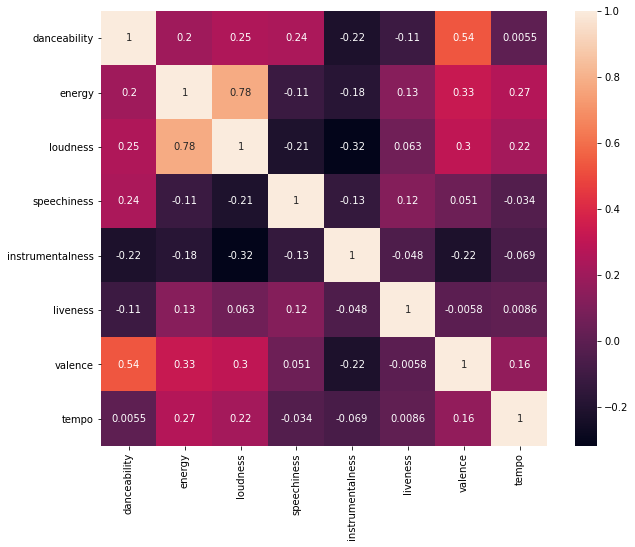

In [162]:
# Correlations
#function for corr_matrix
def corr_matrix_df(df):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    corr_matrix=df.corr(method='pearson')  # default
    fig, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(corr_matrix, annot=True)
    plt.show()

#Calling function
corr_matrix_df(df_kaggle)

# Scaling

In [163]:
df_prep_kaggle = StandardScaler().fit_transform(df_kaggle)

In [164]:
import pickle

scaler = StandardScaler().fit(df_kaggle)
pickle.dump(scaler, open('scaler.pickle', 'wb'))

In [104]:
#key_minimum, value_minimum=auto_kmeans(df_prep_kaggle,200)
#key_minimum, value_minimum

# kmeans model

In [165]:
k=26

kmeans = KMeans(n_clusters=k,
                random_state=1234)
cluster_model=kmeans.fit(df_prep_kaggle) #cluster_model = model name

In [166]:
import joblib

#save the model

model=kmeans
joblib.dump(model, 'model1.pkl')  

#pickle.dump(kmeans, open("save.pkl", "wb"))

#model = KMeans(n_clusters=26, random_state=1234)
#model.fit(X_prep)
# pickle.dump(kmeans, open("save.pkl", "wb"))

['model1.pkl']

In [167]:
cluster_pred=cluster_model.predict(df_prep_kaggle)

In [168]:
df_kaggle.index

Index(['0cS0A1fUEUd1EW3FcF8AEI', '0hbkKFIJm7Z05H8Zl9w30f',
       '11m7laMUgmOKqI3oYzuhne', '19Lc5SfJJ5O1oaxY0fpwfh',
       '2hJjbsLCytGsnAHfdsLejp', '3HnrHGLE9u2MjHtdobfWl9',
       '5DlCyqLyX2AOVDTjjkDZ8x', '02FzJbHtqElixxCmrpSCUa',
       '02i59gYdjlhBmbbWhf8YuK', '06NUxS2XL3efRh0bloxkHm',
       ...
       '45XnLMuqf3vRfskEAMUeCH', '1Cbf6PLWsL4s51eFepXx6L',
       '4pPFI9jsguIh3wC7Otoyy8', '3ASGdyWXeXsXtOIWtm0tv4',
       '52YtxLVUyvtiGPxwwxayHZ', '46LhBf6TvYjZU2SMvGZAbn',
       '7tue2Wemjd0FZzRtDrQFZd', '48Qj61hOdYmUCFJbpQ29Ob',
       '1gcyHQpBQ1lfXGdhZmWrHP', '57tgYkWQTNHVFEt6xDKKZj'],
      dtype='object', name='id', length=174389)

In [169]:
Y=pd.DataFrame(cluster_pred)
Y.columns=["cluster"]
Y.index=df_kaggle.index
Y

,cluster
id,
0cS0A1fUEUd1EW3FcF8AEI,11
0hbkKFIJm7Z05H8Zl9w30f,7
11m7laMUgmOKqI3oYzuhne,9
19Lc5SfJJ5O1oaxY0fpwfh,10
2hJjbsLCytGsnAHfdsLejp,17
...,...
46LhBf6TvYjZU2SMvGZAbn,17
7tue2Wemjd0FZzRtDrQFZd,22
48Qj61hOdYmUCFJbpQ29Ob,15


## Concating Y and big_spotify

In [184]:
df_prep=pd.DataFrame(df_prep_kaggle)
df_prep.columns=df_kaggle.columns
df_prep.index=df_kaggle.index
df_prep

,danceability,energy,loudness,speechiness,instrumentalness,liveness,valence,tempo
id,,,,,,,,
0cS0A1fUEUd1EW3FcF8AEI,0.347919,-0.948791,-0.154111,-0.066549,-0.588004,0.930106,0.413903,1.089753
0hbkKFIJm7Z05H8Zl9w30f,1.790898,0.125710,0.788862,-0.287113,-0.510657,-0.721489,1.608718,-0.995485
11m7laMUgmOKqI3oYzuhne,0.626289,-1.088146,-0.060991,0.374580,-0.589511,1.705763,0.621861,-0.641450
19Lc5SfJJ5O1oaxY0fpwfh,1.097814,1.156204,0.780077,-0.346918,1.804534,-0.460536,-1.823729,0.363273
2hJjbsLCytGsnAHfdsLejp,0.950107,0.822485,1.004092,-0.158725,-0.588829,1.057535,-0.852753,0.167564
...,...,...,...,...,...,...,...,...
46LhBf6TvYjZU2SMvGZAbn,1.450037,1.405576,1.170478,-0.384776,-0.589385,-0.183516,-1.280013,0.296340
7tue2Wemjd0FZzRtDrQFZd,-0.612173,-0.996465,0.015086,-0.382582,-0.589564,-0.083788,-1.121208,-0.736975
48Qj61hOdYmUCFJbpQ29Ob,0.762634,0.389751,-0.112822,-0.425378,2.160212,-0.543642,0.716387,-0.295778


In [185]:
kaggle_clustered_scaled=pd.concat([df_prep,Y],axis=1)

In [186]:
df_original=kaggle_clustered_scaled

df_original.to_csv("/Users/carolinvogt/Becoming_Data_Analyst/Week_07/Day_04/spotify_project/kaggle_clustered_scaled_160k.csv")




In [172]:
#kaggle_clustered["cluster"].value_counts()

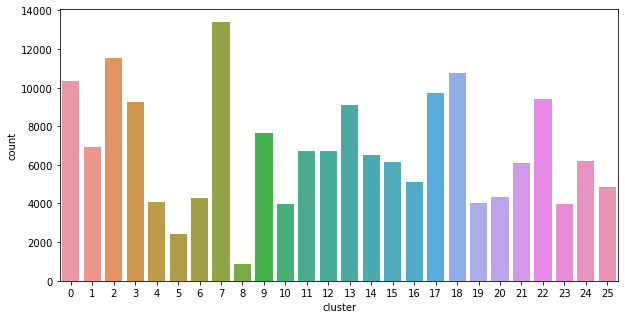

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(x="cluster", data=kaggle_clustered)
plt.show()

In [174]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt

In [175]:
gmm2 = GaussianMixture(n_components=26, covariance_type='tied')
gmm2_pred=gmm2.fit(df_prep_kaggle)
gmm2_pred

GaussianMixture(covariance_type='tied', n_components=26)

In [176]:
import joblib

#save the model

model=kmeans
joblib.dump(model, 'model2.pkl')  

gmm2_pred2=gmm2_pred.predict(df_prep_kaggle)

In [177]:
gmm2_pred2

array([12, 11, 21, ...,  9, 22,  9])

In [178]:
Y=pd.DataFrame(gmm2_pred2)
Y.columns=["cluster"]
Y.index=df_kaggle.index
#Y

In [179]:
kaggle_clustered2=pd.concat([df_kaggle,Y],axis=1)
df_original2=kaggle_clustered2

df_original2.to_csv("/Users/carolinvogt/Becoming_Data_Analyst/Week_07/Day_04/spotify_project/kaggle_clustered2_160k.csv")



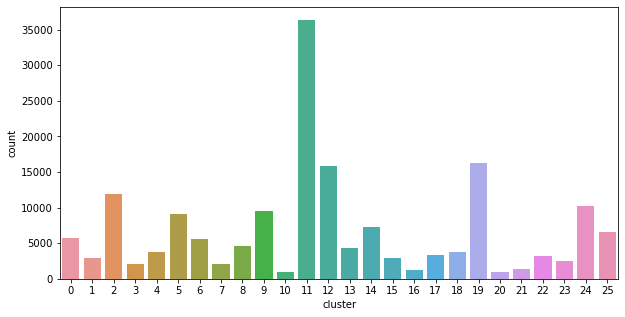

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(x="cluster", data=kaggle_clustered2)
plt.show()

In [142]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor

In [145]:
def Autofeature(X,Y,scaler=StandardScaler(), model=RandomForestRegressor()):    # RandomForestClassifier()  or RandomForestRegressor() for Modell
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import RandomForestRegressor
    from matplotlib import pyplot
    #scaling
    scaler_x = scaler.fit(X)
    X_scaled = pd.DataFrame(scaler_x.transform(X),columns=X.columns, index=X.index)
    #upsampling
    #X, y = balance (X_scaled, Y, "TomekLinks")
    #Xs_scaled, ys = balance (X, y, "SMOTE")
    model.fit(X_scaled, Y)
    # get importance
    importance = model.feature_importances_
    # summarize feature importance
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))
    # plot feature importance
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()

Feature: 0, Score: 0.18110
Feature: 1, Score: 0.09452
Feature: 2, Score: 0.08613
Feature: 3, Score: 0.06630
Feature: 4, Score: 0.07950
Feature: 5, Score: 0.08311
Feature: 6, Score: 0.11169
Feature: 7, Score: 0.13179
Feature: 8, Score: 0.12653
Feature: 9, Score: 0.03933


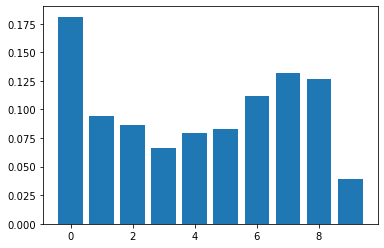

In [146]:
Y=df_original["cluster"]
X=df_original.drop(["cluster"],axis=1)

Autofeature(X,Y,scaler=StandardScaler(), model=RandomForestRegressor())

In [120]:
len(kaggle_clustered.columns) 

11

In [136]:
#kaggle_clustered

In [50]:
#K = range(2, 20)
#silhouette = []

#for k in K:
    #kmeans = KMeans(n_clusters=k,
                    #random_state=1234)
    #kmeans.fit(df_prep_kaggle)
    #silhouette.append(silhouette_score(df_prep_kaggle, kmeans.predict(df_prep_kaggle)))


#plt.figure(figsize=(16,8))
#plt.plot(K, silhouette, 'bx-')
#plt.xlabel('k')
#plt.ylabel('silhouette score')
#plt.xticks(np.arange(min(K), max(K)+1, 1.0))
#plt.title('Silhouette Method showing the optimal k')

KeyboardInterrupt: 